In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


A
torch.Size([20, 20])
tensor([[ 6.3408e-06, -2.4886e-05,  5.5646e-05, -9.8592e-05,  1.5374e-04,
         -2.2115e-04,  3.0062e-04, -3.9246e-04,  4.9652e-04, -6.1256e-04,
          7.4078e-04, -8.8175e-04,  1.0344e-03, -1.1992e-03,  1.3768e-03,
         -1.5660e-03,  1.7674e-03, -1.9818e-03,  2.2075e-03, -2.4455e-03],
        [ 2.0532e-01, -3.7793e-01,  4.7805e-01, -4.7964e-01,  3.7700e-01,
         -1.8703e-01, -5.3294e-02,  2.9410e-01, -4.8293e-01,  5.7619e-01,
         -5.4912e-01,  4.0209e-01, -1.6163e-01, -1.2420e-01,  3.9540e-01,
         -5.9264e-01,  6.7019e-01, -6.0645e-01,  4.0962e-01, -1.1705e-01],
        [ 3.8521e-01, -6.2162e-01,  6.0047e-01, -3.1971e-01, -1.1057e-01,
          5.1103e-01, -7.0784e-01,  6.0808e-01, -2.4308e-01, -2.4029e-01,
          6.3856e-01, -7.7731e-01,  5.8749e-01, -1.3890e-01, -3.8487e-01,
          7.6158e-01, -8.2457e-01,  5.3636e-01, -9.0321e-03, -5.3906e-01],
        [ 5.4241e-01, -7.5669e-01,  4.9172e-01,  1.0010e-01, -6.4964e-01,
          8.

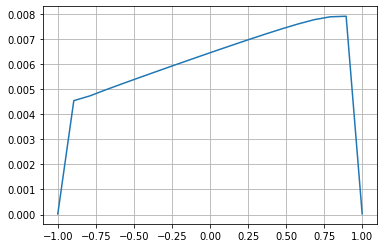

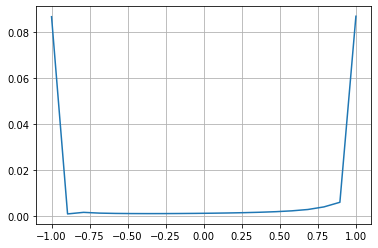

D_i = 2.7878990294993855e-05
tensor(0.0149)


In [2]:
N = 20
rho = 1.225 #kg/m³
dy=2/(N-1)
Clalpha = 1
s = 1
Vinf = 1
# Rectangular Wing
c = torch.linspace(0.1, 0.2, N) 
eps = 1e-7
alpha = 5 * 3.1415/180

A = torch.zeros((N, N))
B = torch.zeros((N, 1))
M = torch.zeros((N, N))
W = torch.zeros((N, N))


theta=torch.zeros((N))

y = torch.linspace(-1+eps, 1-eps, N) 
theta = torch.acos(y/s)

for n in range(1, N+1):  
  for m in range(N):
    A[m, n-1] = torch.sin(n*theta[m]) * (torch.sin(theta[m]) + n*Clalpha*c[m]/(8*s))
    M[m, n-1] = torch.sin(n*theta[m])
    W[m, n-1] = n*torch.sin(n*theta[m]) / torch.sin(theta[m])
  

  B[n-1] = torch.sin(theta[n-1]) * Clalpha*c[n-1]/(8*s) * (alpha)
  


M *= 4*s*Vinf
print('A')
print(A.shape)
print(A)
print('B')
print(B.shape)
print(B)
x = torch.linalg.solve(A, B)
print('x')
print(x.shape)
print(x)

gamma = torch.mm(M,x)

alpha_i = torch.mm(W,x)
D_i = rho*Vinf*torch.sum(gamma*alpha_i*dy)

print('gamma')
print(gamma.shape)
print(gamma)

plt.plot(y, gamma)
plt.grid(True)
plt.show()

plt.plot(y, alpha_i)
plt.grid(True)
plt.show()

print('D_i = {}'.format(D_i))

Lift = rho*Vinf*torch.sum(torch.squeeze(gamma * dy), dim=0)
print(Lift)

In [3]:
print(gamma * dy)

tensor([[2.4684e-06],
        [4.7913e-04],
        [4.9913e-04],
        [5.2493e-04],
        [5.4962e-04],
        [5.7394e-04],
        [5.9799e-04],
        [6.2183e-04],
        [6.4549e-04],
        [6.6898e-04],
        [6.9226e-04],
        [7.1529e-04],
        [7.3798e-04],
        [7.6019e-04],
        [7.8166e-04],
        [8.0189e-04],
        [8.1981e-04],
        [8.3199e-04],
        [8.3439e-04],
        [2.8819e-06]])


In [4]:
wind_vector = [1, 0, 0]
wing_vecotr = [1, 0, 0]

In [5]:
import time
k=5
n=20
M=[1e1, 1e2, 1e3, 1e4, 1e5]

for m in M:
  A = torch.rand((k,n,n))
  B = torch.rand((k,n,int(m)))
  now = time.perf_counter()
  x = torch.linalg.solve(A,B)
  dt = time.perf_counter() - now
  print('dt {}'.format(dt))


dt 0.2697367589989881
dt 0.0001826919997256482
dt 0.11928588999944623
dt 0.0011261359995842213
dt 0.011539105000338168


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LearningToFly:
  def __init__(self, env,
                     aircraft,
                     name='' ):
      self.name = name
      self.env = env
      self.airfoil_list = airfoil_list
      print('{} init'.format(self.name))

  def Step(self):
    pass

class Env:
  def __init__(self, name='', 
                     num_envs = 1, 
                     rand_wind = False, 
                     default_wind_vector = torch.zeros(3),
                     max_speed=1):
    self.name = name
    self.num_envs = num_envs
    self.wind_vector = torch.zeros(self.num_envs, 3)
    self.max_speed = max_speed
    if(rand_wind):
      self.wind_vector.uniform_(-self.max_speed, self.max_speed)
    else:
      self.wind_vector = default_wind_vector.repeat(self.num_envs,1)
    
    self.wind_mag = torch.norm(self.wind_vector, dim=1).view(5,1)
    self.wind_dir = self.wind_vector/self.wind_mag
      
    print('{} init'.format(self.name))

  def print_state(self):
    print('Wind Vectors')
    print(self.wind_vector)
    print('Wind Mags')
    print(self.wind_mag)
    print('Wind Dirs')
    print(self.wind_dir)

class AirFoil:
  def __init__(self, name=''):
    self.name = name
    print('{} init'.format(self.name))

class Aircraft:
  def __init__(self, name='', airfoil_list = []):
    self.name = name
    self.airfoil_list = airfoil_list
    self.mass=1
    self.vel = torch.zeros( (0,0,0) )
    print('{} init'.format(self.name))

env = Env('Static Wind Vector', num_envs = 5, default_wind_vector=torch.tensor([1.0,0.0,3.0]), rand_wind=True, max_speed=2)
env.print_state()
wing1 = AirFoil()
glider = Aircraft(airfoil_list=[wing1])
airfoil_list = [wing1]
LearningToFly(env, airfoil_list)



Static Wind Vector init
Wind Vectors
tensor([[ 1.7147,  1.5284,  1.4752],
        [ 1.2089, -0.1881, -1.2198],
        [-1.1253, -1.8506, -0.7930],
        [-1.6958,  0.0656,  0.4949],
        [ 0.9327, -0.0210,  1.6416]])
Wind Mags
tensor([[2.7299],
        [1.7276],
        [2.3064],
        [1.7678],
        [1.8881]])
Wind Dirs
tensor([[ 0.6281,  0.5599,  0.5404],
        [ 0.6997, -0.1089, -0.7061],
        [-0.4879, -0.8024, -0.3438],
        [-0.9593,  0.0371,  0.2800],
        [ 0.4940, -0.0111,  0.8694]])
 init
 init
 init


In [ ]:
torch.rand((5,5))

In [ ]:
test = LiftingLine('Airfoil')